In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

# Model scaled to events
Default option in F5C

In [7]:
r1 = pd.read_csv('./5_aligned_events/events_reverse_1.tsv', delimiter='\t')
r1['sample_mean'] = r1.apply(lambda row: sum(map(float, row['samples'].split(','))) / len(row['samples'].split(',')), axis=1)

In [58]:
# Place samples at end of dataframe as it is least important
cols = list(r1)
cols[-2], cols[-1] = cols[-1], cols[-2]
r1 = r1.reindex(columns=cols)
r1.head(10)

,contig,position,reference_kmer,read_index,strand,event_index,event_level_mean,event_stdv,event_length,model_kmer,model_mean,model_stdv,standardized_level,sample_mean,samples
0,reverse_1,1,TTGTCGGAT,3,t,114,71.91,2.309,0.0018,TTGTCGGAT,73.51,4.27,-0.46,64.962511,"64.329,66.4671,65.992,62.4284,67.1798,62.9036,..."
1,reverse_1,2,TGTCGGATT,3,t,115,66.25,1.258,0.0008,TGTCGGATT,70.55,3.21,-1.65,58.983700,"60.0528,58.6273,56.9644,60.2903"
2,reverse_1,2,TGTCGGATT,3,t,116,70.47,3.739,0.0008,TGTCGGATT,70.55,3.21,-0.03,63.438150,"62.9036,60.0528,60.7655,70.0307"
3,reverse_1,3,GTCGGATTC,3,t,117,129.47,1.786,0.0016,GTCGGATTC,121.22,11.14,0.91,125.740625,"124.909,121.583,127.522,125.147,127.285,125.38..."
4,reverse_1,4,TCGGATTCG,3,t,118,132.35,0.422,0.0006,TCGGATTCG,130.21,3.20,0.83,128.789667,"128.473,129.423,128.473"
5,reverse_1,4,TCGGATTCG,3,t,119,131.59,1.662,0.0032,TCGGATTCG,130.21,3.20,0.53,127.982750,"130.373,128.948,129.185,128.71,123.959,130.611..."
6,reverse_1,4,TCGGATTCG,3,t,120,129.17,2.072,0.0010,TCGGATTCG,130.21,3.20,-0.40,125.431600,"124.909,128.71,122.058,126.572,124.909"
7,reverse_1,4,TCGGATTCG,3,t,121,132.62,2.616,0.0008,TCGGATTCG,130.21,3.20,0.93,129.066500,"129.185,126.097,127.522,133.462"
8,reverse_1,4,TCGGATTCG,3,t,122,129.13,2.263,0.0010,TCGGATTCG,130.21,3.20,-0.42,125.384200,"126.097,126.572,124.909,128.235,121.108"
9,reverse_1,5,CGGATTCGT,3,t,123,115.97,1.574,0.0012,CGGATTCGT,115.48,3.62,0.17,111.486333,"113.981,112.08,109.942,109.467,113.031,110.417"


In [9]:
r1_3 = r1[r1['read_index'] ==3]

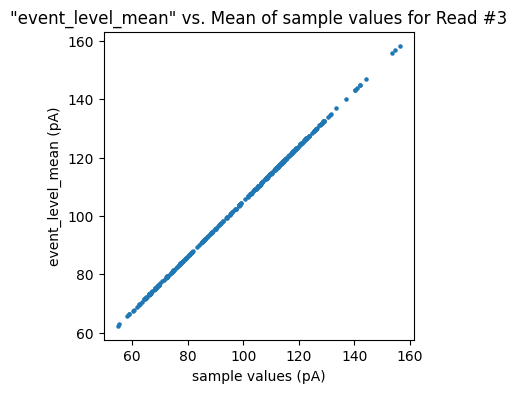

This plots shows that the mean of the individual sample values is related to the event_level_mean column via a linear transformation.


In [10]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()

ax.scatter(r1_3['sample_mean'], r1_3['event_level_mean'],marker='.', s=20, alpha=1)
ax.set_title('"event_level_mean" vs. Mean of sample values for Read #3')
ax.set_xlabel('sample values (pA)')
ax.set_ylabel('event_level_mean (pA)')
plt.show()
print('This plots shows that the mean of the individual sample values is related to the event_level_mean column via a linear transformation.')


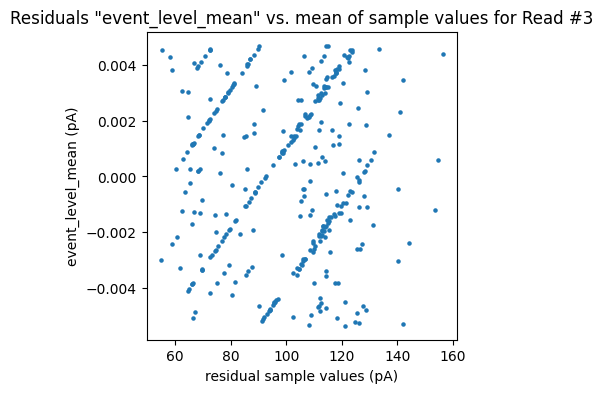

This plot shows the residuals after the linear regression is subtracted
There is no pattern, except some diagonal lines, which could perhaps be due to rounding errors.
The equation of the regression is:
event_level_mean = 0.9469 x sample_mean + 10.3981


In [11]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()

coef_3 = np.polyfit(r1_3['sample_mean'],r1_3['event_level_mean'],1)
ax.scatter(r1_3['sample_mean'], r1_3['event_level_mean'] - coef_3[0]*r1_3['sample_mean']-coef_3[1] ,marker='.', s=20, alpha=1)
ax.set_title('Residuals "event_level_mean" vs. mean of sample values for Read #3')
ax.set_xlabel('residual sample values (pA)')
ax.set_ylabel('event_level_mean (pA)')
plt.show()
print('This plot shows the residuals after the linear regression is subtracted\nThere is no pattern, except some diagonal lines, which could perhaps be due to rounding errors.')
print('The equation of the regression is:')
print(f'event_level_mean = {coef_3[0]:.4f} x sample_mean + {coef_3[1]:.4f}')

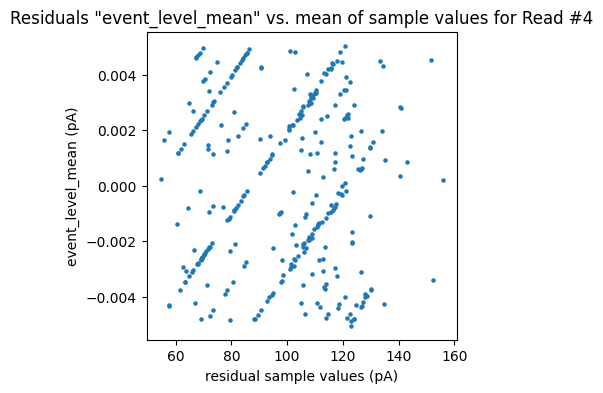

This plot shows residuals for Read 4
The equation of the regression is:
event_level_mean = 0.9497 x sample_mean + 13.3402
Although the gradient is similar, we see that the shift is very different


In [12]:
r1_4 = r1[r1['read_index'] ==4]
fig = plt.figure(figsize=(4,4))
ax = fig.gca()

coef_4 = np.polyfit(r1_4['sample_mean'],r1_4['event_level_mean'],1)
ax.scatter(r1_4['sample_mean'], r1_4['event_level_mean'] - coef_4[0]*r1_4['sample_mean']-coef_4[1] ,marker='.', s=20, alpha=1)
ax.set_title('Residuals "event_level_mean" vs. mean of sample values for Read #4')
ax.set_xlabel('residual sample values (pA)')
ax.set_ylabel('event_level_mean (pA)')
plt.show()
print('This plot shows residuals for Read 4')
print('The equation of the regression is:')
print(f'event_level_mean = {coef_4[0]:.4f} x sample_mean + {coef_4[1]:.4f}')
print(f'Although the gradient is similar, we see that the shift is very different')

In [13]:
ids = [6,7,9]
print('For the next 4 reads, the equations are: ')
for id in ids:
    r1_x = r1[r1['read_index'] ==id]
    coef_9 = np.polyfit(r1_x['sample_mean'],r1_x['event_level_mean'],1)
    print(f'event_level_mean = {coef_9[0]:.4f} x sample_mean + {coef_9[1]:.4f}')
print('There is variation in both the means and the shifts.')
print('Perhaps the event_level_mean are comparable while the sample_means are device specific')

For the next 4 reads, the equations are: 
event_level_mean = 0.9490 x sample_mean + 13.0693
event_level_mean = 0.9606 x sample_mean + 12.3871
event_level_mean = 0.9752 x sample_mean + 9.9570
There is variation in both the means and the shifts.
Perhaps the event_level_mean are comparable while the sample_means are device specific


In [14]:
model10path = '../models_kmer/R104_400bps_9mer.model'
model10 = {}
with open(model10path, 'r') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        model10[row[0]] = row[1]

model10path_f5c = './R10.model'
model10f5c = {}
with open(model10path_f5c, 'r') as tsvfile:
    reader = csv.reader(tsvfile, delimiter=',')
    for row in reader:
        row = ([thing.replace('/','').strip() for thing in row])
        model10f5c[row[2]] = (float(row[0]), float(row[1]))
print('Another model has been found for R10, in the F5C package folder under model.h')

Another model has been found for R10, in the F5C package folder under model.h


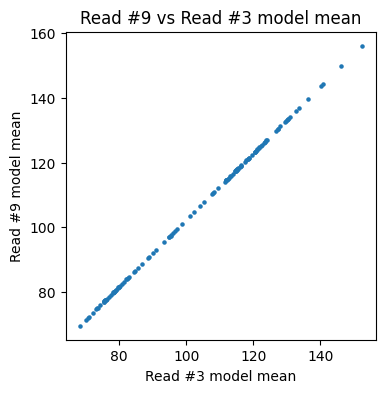

read_9_model = 1.0298 x read_3_model + -0.7497
ratio of coefficients for sample scaling: 1.029787947214521
ratio for scaling model means is same as 


In [15]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
r1_9 = r1[r1['read_index'] ==9]

model_comparison = pd.DataFrame(index = r1['reference_kmer'].unique(), columns=['model_3', 'model_4', 'model_9', 'model_kmer', 'model_f5c'])
for reference_kmer in model_comparison.index:
    try: 
        model_comparison.loc[reference_kmer, 'model_3'] = r1_3[r1_3.reference_kmer == reference_kmer].model_mean.iloc[0]
        model_comparison.loc[reference_kmer, 'model_4'] = r1_4[r1_4.reference_kmer == reference_kmer].model_mean.iloc[0]
        model_comparison.loc[reference_kmer, 'model_9'] = r1_9[r1_9.reference_kmer == reference_kmer].model_mean.iloc[0]
        model_comparison.loc[reference_kmer, 'model_kmer'] = float(model10[reference_kmer])
        model_comparison.loc[reference_kmer, 'model_f5c'] = float(model10f5c[reference_kmer][0])
    except:
        model_comparison.loc[reference_kmer, 'model_3'] =  np.nan
        model_comparison.loc[reference_kmer, 'model_4'] =  np.nan
        model_comparison.loc[reference_kmer, 'model_9'] =  np.nan
        model_comparison.loc[reference_kmer, 'model_kmer'] = np.nan
        model_comparison.loc[reference_kmer, 'model_f5c'] = np.nan
# model_comparison['model_9']
ax.scatter(model_comparison['model_3'], model_comparison['model_9'] ,marker='.', s=20, alpha=1)
ax.set_title('Read #9 vs Read #3 model mean')
ax.set_xlabel('Read #3 model mean')
ax.set_ylabel('Read #9 model mean')
plt.show()


coef = np.polyfit(pd.to_numeric(model_comparison['model_3'].dropna()).values, pd.to_numeric(model_comparison['model_9'].dropna()).values,1)
print(f'read_9_model = {coef[0]:.4f} x read_3_model + {coef[1]:.4f}')
print(f'ratio of coefficients for sample scaling: {coef_9[0]/ coef_3[0]}')
print(f'ratio for scaling model means is same as ')

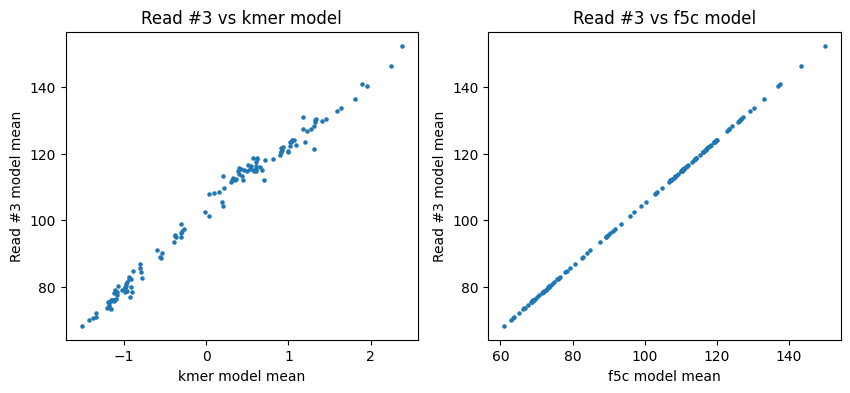

This plot shows that the R10 model used in kmer_models is not consistent with the model used by F5C
Therefore from herein, we use F5C model as a reference.


In [16]:
# Plot of f5c model mean vs. R10 model file values
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axes.flatten()

ax1.scatter(model_comparison['model_kmer'], model_comparison['model_3'] ,marker='.', s=20, alpha=1)
ax1.set_title('Read #3 vs kmer model')
ax1.set_xlabel('kmer model mean')
ax1.set_ylabel('Read #3 model mean')

ax2.scatter(model_comparison['model_f5c'], model_comparison['model_3'] ,marker='.', s=20, alpha=1)
ax2.set_title('Read #3 vs f5c model')
ax2.set_xlabel('f5c model mean')
ax2.set_ylabel('Read #3 model mean')
plt.show()
print('This plot shows that the R10 model used in kmer_models is not consistent with the model used by F5C')
print('Therefore from herein, we use F5C model as a reference.')

In [17]:
r1

,contig,position,reference_kmer,read_index,strand,event_index,event_level_mean,event_stdv,event_length,model_kmer,model_mean,model_stdv,standardized_level,samples,sample_mean
0,reverse_1,1,TTGTCGGAT,3,t,114,71.91,2.309,0.0018,TTGTCGGAT,73.51,4.27,-0.46,"64.329,66.4671,65.992,62.4284,67.1798,62.9036,...",64.962511
1,reverse_1,2,TGTCGGATT,3,t,115,66.25,1.258,0.0008,TGTCGGATT,70.55,3.21,-1.65,"60.0528,58.6273,56.9644,60.2903",58.983700
2,reverse_1,2,TGTCGGATT,3,t,116,70.47,3.739,0.0008,TGTCGGATT,70.55,3.21,-0.03,"62.9036,60.0528,60.7655,70.0307",63.438150
3,reverse_1,3,GTCGGATTC,3,t,117,129.47,1.786,0.0016,GTCGGATTC,121.22,11.14,0.91,"124.909,121.583,127.522,125.147,127.285,125.38...",125.740625
4,reverse_1,4,TCGGATTCG,3,t,118,132.35,0.422,0.0006,TCGGATTCG,130.21,3.20,0.83,"128.473,129.423,128.473",128.789667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218927,reverse_1,170,AAACACCCA,11204,t,482,131.30,1.803,0.0006,TGGGTGTTT,123.59,17.56,0.45,"121.459,121.459,125.482",122.800000
1218928,reverse_1,170,AAACACCCA,11204,t,481,126.84,3.598,0.0012,TGGGTGTTT,123.59,17.56,0.19,"112.702,117.436,122.879,114.832,122.879,117.909",118.106167
1218929,reverse_1,171,AACACCCAA,11204,t,480,109.11,1.932,0.0016,TTGGGTGTT,117.92,18.12,-0.50,"103.709,101.342,98.5022,97.3189,99.2122,97.555...",99.448875
1218930,reverse_1,172,ACACCCAAG,11204,t,479,129.19,1.956,0.0014,CTTGGGTGT,138.63,11.09,-0.88,"119.566,119.802,123.826,122.879,118.856,121.45...",120.580000


In [31]:
r1_p7 = r1[r1.position == 7][['reference_kmer', 'read_index', 'event_level_mean', 'event_stdv', 'event_length', 'model_kmer', 'model_mean', 'model_stdv', 'standardized_level','sample_mean']]
r1_p7

,reference_kmer,read_index,event_level_mean,event_stdv,event_length,model_kmer,model_mean,model_stdv,standardized_level,sample_mean
17,GATTCGTCG,3,126.88,6.574,0.0006,GATTCGTCG,123.31,7.37,0.60,123.008667
368,GATTCGTCG,4,128.72,2.921,0.0024,GATTCGTCG,126.57,7.74,0.33,121.492500
369,GATTCGTCG,4,133.03,1.604,0.0006,GATTCGTCG,126.57,7.74,1.00,126.033000
688,GATTCGTCG,6,128.51,0.892,0.0008,GATTCGTCG,126.22,8.30,0.32,121.649000
689,GATTCGTCG,6,134.36,1.802,0.0008,GATTCGTCG,126.22,8.30,1.14,127.812500
...,...,...,...,...,...,...,...,...,...,...
1106583,GATTCGTCG,8503,127.93,1.433,0.0012,GATTCGTCG,124.82,8.25,0.44,122.482500
1106584,GATTCGTCG,8503,132.84,3.090,0.0008,GATTCGTCG,124.82,8.25,1.13,127.603250
1108580,GATTCGTCG,8517,125.89,5.023,0.0010,GATTCGTCG,122.45,11.00,0.32,122.964200
1108848,GATTCGTCG,8522,126.06,0.869,0.0006,GATTCGTCG,126.91,10.07,-0.09,118.332667


In [22]:
standardised_levels

[-0.007554035567715461,
 0.055821140566903286,
 -0.7335781238329973,
 0.2876879067814403,
 -0.14594839698556647,
 -0.240802101279408,
 -0.2899881869300194,
 0.31051826758690554,
 -0.6184389587566589,
 0.02517845840556978,
 0.14040586308367112,
 0.11684835878732618,
 -0.4265644878262777,
 0.13282365462994208,
 0.40030605929898916,
 0.27383268381397763,
 0.18900032,
 -0.6184597867715557,
 -0.5454917460475787,
 0.2301592554969361,
 -0.7238190805959268,
 0.38847354248450827,
 0.15731463096386225,
 -0.4765154639175257,
 0.4598687520154789,
 0.2672819735187514,
 -0.030494922279792742,
 0.09390753543702443,
 -0.08851838002646262,
 -0.9444900231223774,
 -0.059546486731979494,
 0.5770100289995167,
 0.2949870522227018,
 0.1639618484824923,
 -1.234922378287042,
 -0.7386149309122237,
 -1.0878998744148876,
 -0.21000412974083085,
 -0.126973063038045,
 -0.020109328005971323,
 0.26077517575306114,
 0.728254752773733,
 0.23899022445524545,
 -0.27561916714938534,
 -0.3095379757764128,
 -0.52798378254328

Text(0, 0.5, 'current (pA)')

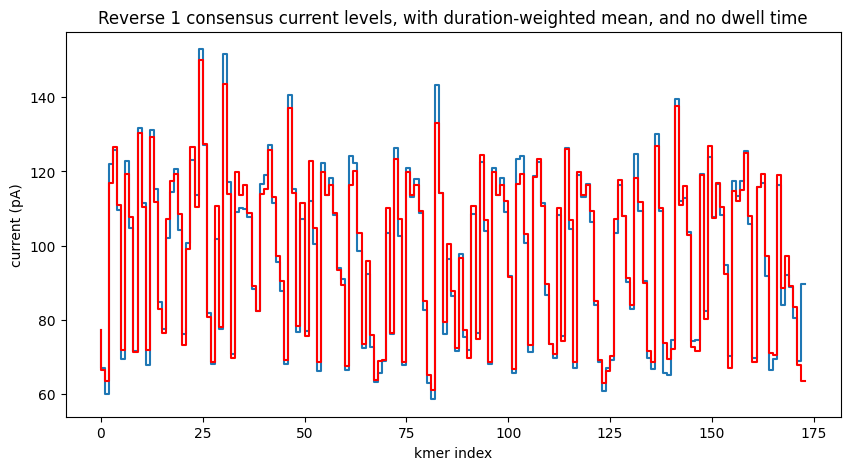

In [25]:
# Take duration-weighted average of standardised levels, and then unstandardise them
# This means reads with more/longer events for a particular kmer will have greater influence on outcome.
position_to_kmer = r1[['position', 'reference_kmer']].drop_duplicates().set_index('position')
standardised_levels = []
current_levels = []
tempalte = []

for i in range(182-8):
    r1_filt = r1[r1.position == i][['position','read_index','standardized_level','event_length']].replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')
    standardised_levels.append((r1_filt['standardized_level'] * r1_filt['event_length']).sum() / (r1_filt['event_length']).sum())
    reference_kmer = position_to_kmer.loc[i, 'reference_kmer']
    current_levels.append(float(model10f5c[reference_kmer][0]) + standardised_levels[-1] * float(model10f5c[reference_kmer][1]))
    tempalte.append(float(model10f5c[reference_kmer][0]))

plt.figure(figsize=(10,5))

plt.step(current_levels, '-')
plt.step(tempalte,'r-')
plt.title('Reverse 1 consensus current levels, with duration-weighted mean, and no dwell time')
plt.xlabel('kmer index')
plt.ylabel('current (pA)')

This looks good, but unseen is that the standardised level for the last base is very high (7)


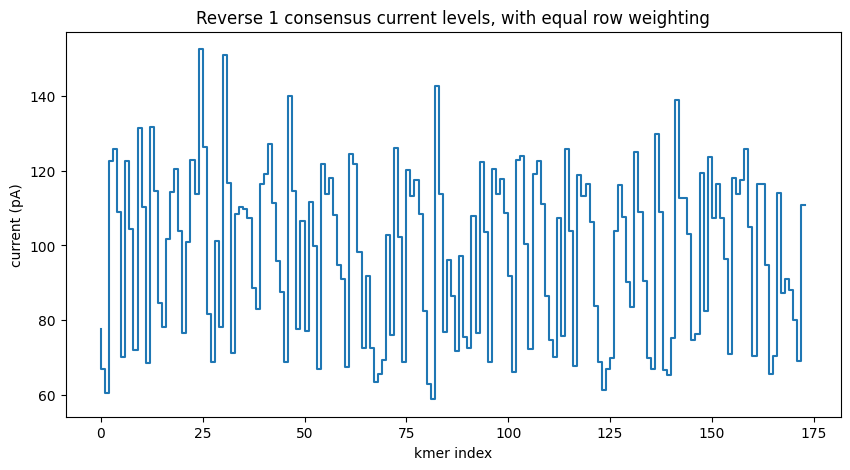

In [ ]:
# Take average of standardised levels, and then unstandardise them
# This means all reads will have same influence on outcome. (outliers with short length become more problematic)
position_to_kmer = r1[['position', 'reference_kmer']].drop_duplicates().set_index('position')
standardised_levels = []
current_levels = []

for i in range(182-8):
    r1_filt = r1[r1.position == i][['position','read_index','standardized_level','event_length']].replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')
    standardised_levels.append(r1_filt.groupby('read_index').apply(lambda x: (x['standardized_level'] * x['event_length']).sum() / x['event_length'].sum(), include_groups=False).mean())
    reference_kmer = position_to_kmer.loc[i, 'reference_kmer']
    current_levels.append(float(model10f5c[reference_kmer][0]) + standardised_levels[-1] * float(model10f5c[reference_kmer][1]))

plt.figure(figsize=(10,5))
plt.step(current_levels, '-')
plt.title('Reverse 1 consensus current levels, with equal row weighting')
plt.xlabel('kmer index')
plt.ylabel('current (pA)')

print("This looks good, but unseen is that the standardised level for the last base is very high (7)")

# Events scaled to model
--scale-events tag used by F5C to scale events to model rather than vice versa

In [213]:
r1_scaled = pd.read_csv('./5_aligned_events/events_reverse_1_unscaled_id.tsv', delimiter='\t')
# # Take average of samples corresponding to each event.
# r1_scaled['sample_mean'] = r1_scaled.apply(lambda row: sum(map(float, row['samples'].split(','))) / len(row['samples'].split(',')), axis=1)
# # Place samples at end of dataframe as it is least important
# cols = list(r1_scaled)
# cols[-2], cols[-1] = cols[-1], cols[-2]
# r1_scaled = r1_scaled.reindex(columns=cols)

In [149]:
r1_scaled.loc[0:10]

,contig,position,reference_kmer,read_name,strand,event_index,event_level_mean,event_stdv,event_length,model_kmer,model_mean,model_stdv,standardized_level,start_idx,end_idx,sample_mean,samples
0,reverse_1,1,TTGTCGGAT,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,114,64.96,2.309,0.0018,TTGTCGGAT,66.65,6.51,-0.32,533,542,64.962511,"64.329,66.4671,65.992,62.4284,67.1798,62.9036,..."
1,reverse_1,2,TGTCGGATT,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,115,61.21,3.497,0.0016,TGTCGGATT,63.53,4.90,-0.58,542,550,61.210925,"60.0528,58.6273,56.9644,60.2903,62.9036,60.052..."
2,reverse_1,3,GTCGGATTC,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,117,125.74,1.786,0.0016,GTCGGATTC,117.03,16.98,0.63,550,558,125.740625,"124.909,121.583,127.522,125.147,127.285,125.38..."
3,reverse_1,4,TCGGATTCG,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,118,127.41,2.302,0.0066,TCGGATTCG,126.53,4.88,0.22,558,591,127.407212,"128.473,129.423,128.473,130.373,128.948,129.18..."
4,reverse_1,5,CGGATTCGT,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,123,111.66,2.863,0.0050,CGGATTCGT,110.97,5.52,0.15,591,616,111.662280,"113.981,112.08,109.942,109.467,113.031,110.417..."
5,reverse_1,6,GGATTCGTC,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,129,73.45,6.860,0.0016,GGATTCGTC,71.84,8.15,0.24,616,624,73.445725,"72.6439,71.9312,73.5942,69.0804,69.0804,67.417..."
6,reverse_1,7,GATTCGTCG,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,131,123.01,6.574,0.0006,GATTCGTCG,119.24,11.23,0.41,624,627,123.008667,"128.948,126.81,113.268"
7,reverse_1,8,ATTCGTCGT,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,132,106.26,2.006,0.0016,ATTCGTCGT,107.64,4.58,-0.37,627,635,106.260000,"105.904,108.279,101.865,106.854,107.567,108.27..."
8,reverse_1,9,TTCGTCGTC,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,133,74.63,7.399,0.0016,TTCGTCGTC,71.40,7.60,0.53,635,643,74.633587,"86.6605,70.5058,70.0307,73.3567,67.8925,73.356..."
9,reverse_1,10,TCGTCGTCG,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,t,134,133.56,4.263,0.0014,TCGTCGTCG,130.25,10.04,0.41,643,650,133.563571,"137.263,136.55,135.362,136.55,132.987,132.987,..."


In [75]:
r1.loc[0:10]

,contig,position,reference_kmer,read_index,strand,event_index,event_level_mean,event_stdv,event_length,model_kmer,model_mean,model_stdv,standardized_level,sample_mean,samples
0,reverse_1,1,TTGTCGGAT,3,t,114,71.91,2.309,0.0018,TTGTCGGAT,73.51,4.27,-0.46,64.962511,"64.329,66.4671,65.992,62.4284,67.1798,62.9036,..."
1,reverse_1,2,TGTCGGATT,3,t,115,66.25,1.258,0.0008,TGTCGGATT,70.55,3.21,-1.65,58.983700,"60.0528,58.6273,56.9644,60.2903"
2,reverse_1,2,TGTCGGATT,3,t,116,70.47,3.739,0.0008,TGTCGGATT,70.55,3.21,-0.03,63.438150,"62.9036,60.0528,60.7655,70.0307"
3,reverse_1,3,GTCGGATTC,3,t,117,129.47,1.786,0.0016,GTCGGATTC,121.22,11.14,0.91,125.740625,"124.909,121.583,127.522,125.147,127.285,125.38..."
4,reverse_1,4,TCGGATTCG,3,t,118,132.35,0.422,0.0006,TCGGATTCG,130.21,3.20,0.83,128.789667,"128.473,129.423,128.473"
5,reverse_1,4,TCGGATTCG,3,t,119,131.59,1.662,0.0032,TCGGATTCG,130.21,3.20,0.53,127.982750,"130.373,128.948,129.185,128.71,123.959,130.611..."
6,reverse_1,4,TCGGATTCG,3,t,120,129.17,2.072,0.0010,TCGGATTCG,130.21,3.20,-0.40,125.431600,"124.909,128.71,122.058,126.572,124.909"
7,reverse_1,4,TCGGATTCG,3,t,121,132.62,2.616,0.0008,TCGGATTCG,130.21,3.20,0.93,129.066500,"129.185,126.097,127.522,133.462"
8,reverse_1,4,TCGGATTCG,3,t,122,129.13,2.263,0.0010,TCGGATTCG,130.21,3.20,-0.42,125.384200,"126.097,126.572,124.909,128.235,121.108"
9,reverse_1,5,CGGATTCGT,3,t,123,115.97,1.574,0.0012,CGGATTCGT,115.48,3.62,0.17,111.486333,"113.981,112.08,109.942,109.467,113.031,110.417"


In [185]:
# Opening up read 3 directly 
from ont_fast5_api.fast5_interface import get_fast5_file

multi_0 = "../data f5c/1_input_fast5/240129_R10_newsystem_verified0.fast5"

# Chosen FAST5 file to observe
fast5_filepath = multi_0

with get_fast5_file(fast5_filepath, mode="r") as f5:
    for read in f5.get_reads():
        if read.read_id == "0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5":
            raw_data = read.get_raw_data()
            print(read.read_id, raw_data)
            print(read.get_channel_info())
            range_ = read.get_channel_info()['range']
            digitisation = read.get_channel_info()['digitisation']
            offset = read.get_channel_info()['offset']
            scale = range_/digitisation
            print(f'FAST5 file {scale=}, {offset=}')
            scale3, offset3 = 0.2375684, -9.55476/0.2375684
            scale4, offset4 = 0.23689054, -12.62672447/0.23689054

            print(f'F5C {scale4=}, {offset4=}')
            print('Found')
            break

digit_data_3 = raw_data
raw_data_3 = (np.array(raw_data)+offset3) * scale3
raw_data_3_fast5 = (np.array(raw_data)+offset) * scale

0f4ad5d7-37e3-4357-9773-fa77f5c63038 [486 496 458 ... 426 423 656]
{'channel_number': 122, 'digitisation': 8192.0, 'offset': 6.0, 'range': 1842.912109375, 'sampling_rate': 5000.0}
FAST5 file scale=0.22496485710144043, offset=6.0
F5C scale4=0.23689054, offset4=-53.30193628669173
Found


In [123]:
for i in raw_data:
    print(i)

160.30336973000001
121.69021171000001
120.97954009
116.24172929000001
114.10971443000001
117.66307253000001
118.61063469000001
118.13685361
116.95240091000001
122.63777387000002
121.21643063
123.58533603000002
117.18929145000001
120.74264955000001
118.61063469000001
120.74264955000001
122.87466441000002
114.34660497
118.84752523
118.84752523
118.84752523
125.00667927000002
114.10971443000001
119.79508739
116.24172929000001
118.84752523
123.82222657000003
120.26886847
120.50575901
121.45332117000002
117.18929145000001
115.05727659
113.87282389
116.00483875
114.58349551
115.76794821
113.87282389
115.05727659
113.87282389
121.45332117000002
113.63593335
116.47861983000001
110.55635633
114.82038605000001
120.74264955000001
111.03013741000001
116.00483875
111.03013741000001
115.53105767000001
117.42618199
112.92526173
113.16215227
116.24172929000001
122.87466441000002
115.53105767000001
118.84752523
104.87098337
121.45332117000002
140.16767383
160.06647919000002
156.98690217000004
136.61431

102.11652897619048 22.52342593504589 102.19747290878958 21.90921969336454
470.0595238095238 94.80817286746002 484.7141527001862 92.48668052917832 480.08935442496795 97.42389477735541
107.0966627455893 21.328507061176804 110.39343923985182 20.806252869033173


Text(0, 0.5, 'Current (pA)')

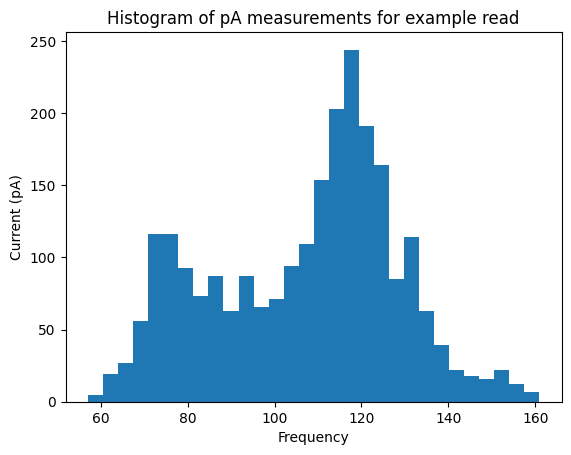

In [186]:
print(raw_data_3.mean(), raw_data_3.std(), raw_data_4.mean(), raw_data_4.std())
print(digit_data_3.mean(), digit_data_3.std(), digit_data_4.mean(), digit_data_4.std(), digit_data_6.mean(), digit_data_6.std())
print(raw_data_3_fast5.mean(), raw_data_3_fast5.std(), raw_data_4_fast5.mean(), raw_data_4_fast5.std())
plt.hist(raw_data_3_fast5, bins=30);
plt.title('Histogram of pA measurements for example read')
plt.xlabel('Frequency')
plt.ylabel('Current (pA)')

In [157]:
r1_p7_scaled = r1_scaled[r1_scaled.position == 7][['reference_kmer', 'read_name', 'event_level_mean', 'event_stdv', 'event_length', 'model_kmer', 'model_mean', 'model_stdv', 'standardized_level','sample_mean']]
r1_p7_scaled.head(10)

,reference_kmer,read_name,event_level_mean,event_stdv,event_length,model_kmer,model_mean,model_stdv,standardized_level,sample_mean
6,GATTCGTCG,0d9274ec-cb72-4141-b3b0-ec63d4cdd4b5,123.01,6.574,0.0006,GATTCGTCG,119.24,11.23,0.41,123.008667
171,GATTCGTCG,0e7fe863-c231-45c3-a786-bd3d62a4329c,122.40,3.212,0.0030,GATTCGTCG,119.24,11.23,0.34,122.400600
325,GATTCGTCG,0f4ad5d7-37e3-4357-9773-fa77f5c63038,124.73,3.252,0.0016,GATTCGTCG,119.24,11.23,0.57,124.730750
496,GATTCGTCG,1398d546-c48d-4bf6-bf0a-4228cc1bebe3,99.07,25.396,0.0022,GATTCGTCG,119.24,11.23,-2.17,99.069891
658,GATTCGTCG,16807324-ae33-41d7-a74d-2915d6731bd0,123.67,2.015,0.0006,GATTCGTCG,119.24,11.23,0.49,123.670333
805,GATTCGTCG,1b7229dc-04cf-4989-8203-02135dd67c2e,121.87,3.648,0.0010,GATTCGTCG,119.24,11.23,0.26,121.874000
974,GATTCGTCG,1d066d2f-d123-4c98-a14e-f3308e19b321,123.95,2.580,0.0028,GATTCGTCG,119.24,11.23,0.49,123.954571
1137,GATTCGTCG,14efcc9d-d04b-42f5-a57c-49dd7b981fd2,109.60,11.348,0.0024,GATTCGTCG,119.24,11.23,-1.14,109.604825
1287,GATTCGTCG,23b30005-8399-4960-b6b5-02e4af9378cb,123.32,3.336,0.0040,GATTCGTCG,119.24,11.23,0.44,123.323300
1458,GATTCGTCG,29cefdd9-3fb5-472f-8548-018002d04f7b,122.26,8.023,0.0016,GATTCGTCG,119.24,11.23,0.33,122.264375


<Axes: >

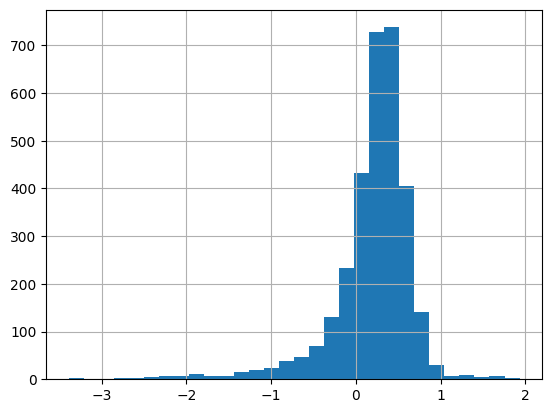

In [156]:
r1_p7_scaled['standardized_level'].replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any').hist(bins=30)

In [191]:
total = 0
for key, value in model10f5c.items():
    total += value[0]
print(total/4**9)

96.72446195335165


In [214]:
r1.groupby('read_index')['event_level_mean'].mean()
r1_scaled.groupby('read_name')['event_level_mean'].mean()

read_name
0002e66d-e79d-419c-919a-fb9ddbe6ef8a     97.420836
000835c8-82a6-4aad-832f-d0f4ce9565f3     96.407642
0012ee89-5d04-4e0b-888c-18a31bd1edb8     98.519877
001ff134-1066-4c5f-9783-e6d9ca915eba     98.870161
00219032-4a38-4696-8aa4-50b3f119d07a     96.483794
                                           ...    
ffd55b47-00d0-40d0-9677-602e720b87fe    101.190000
ffe46ddc-b8e2-4ea5-a48b-09496aff71f2     95.472665
ffefac31-41bd-47ba-ace7-d19c50310965     99.038211
fff19be4-9ec4-4a68-8e72-71c4376bd418     96.337493
fff9be98-9021-436c-8940-3a2ffdcfc9ff    100.089215
Name: event_level_mean, Length: 3551, dtype: float64